In [92]:
#!pip install pandas_profiling

# Libraries and Global Settings

In [102]:
import pandas as pd  # work with Pandas dataframes
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential # Modelart

from keras.layers import Dense, Activation, Flatten, BatchNormalization # Model Layers
from keras.layers import Conv2D, MaxPooling2D # Model Layers

from keras.losses import categorical_crossentropy # die Loss Funktion

from keras.optimizers import RMSprop # die Lossfunktion

import matplotlib.pyplot as plt

import warnings # Funktionalität zur Unterdrückung von Warnungen
warnings.filterwarnings('ignore')

# Importing Data

Fist of all we import the data which were generated in the whole preprocess (`df_for_ML`).

In [94]:
df_for_ML = pd.read_csv('df_for_ML.csv')

In [95]:
df_for_ML.head()

,Datum,Temp,WG,WR,Druck,NO,NO2,SO2,CO,Niederschlag,PM10
0,2000-01-01,3.718,1.959896,234.922917,991.8,17.6266,24.236,10.38,0.9109,3.5892,11.3772
1,2000-01-02,3.848,2.172912,222.511250,996.9,14.2886,28.698,10.74,0.8870,3.5212,12.3972
2,2000-01-03,1.463,2.295208,220.181250,996.2,19.0638,35.336,10.29,0.8394,0.8398,19.9480
3,2000-01-04,4.934,3.574979,220.885417,989.9,8.2660,24.210,13.42,0.7822,1.4894,11.4780
4,2000-01-05,6.917,2.237208,220.554167,989.7,11.3496,26.208,14.27,1.1890,4.3200,12.9260


In [96]:
df_for_ML.describe()

,Temp,WG,WR,Druck,NO,NO2,SO2,CO,Niederschlag,PM10
count,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000,7458.000000
mean,12.037186,1.981211,194.085750,984.837622,20.628170,33.558937,6.631525,0.455946,1.429776,19.585107
std,7.414490,0.727090,61.500193,7.725808,26.766503,16.107154,4.776749,0.296478,3.356878,11.001963
min,-11.430000,0.600000,2.300000,947.400000,0.047220,0.000000,0.000000,0.023830,0.000000,0.000000
25%,6.259250,1.500000,153.713579,980.585000,5.287000,22.260000,3.138250,0.226937,0.000000,12.481200
50%,12.205000,1.800000,211.071147,985.400000,11.165000,31.175000,5.959850,0.393567,0.060000,17.310000
75%,17.730000,2.300000,234.489428,989.800000,24.995000,42.510000,9.152800,0.625345,1.270000,24.133000
max,31.460000,7.155542,359.700000,1011.300000,345.900000,138.800000,44.690000,2.984000,51.100000,211.700000


# Modeling

## Data Preparation

Definition of Sampling Rates

### Data Scaling and Normalization

In [97]:
df_for_ML_woDate = df_for_ML.drop('Datum', axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
df_for_ML_scaled = min_max_scaler.fit_transform(df_for_ML_woDate.values)
df_for_ML_norm = pd.DataFrame(data=df_for_ML_scaled, columns=df_for_ML_woDate.columns)
df_for_ML_norm

,Temp,WG,WR,Druck,NO,NO2,SO2,CO,Niederschlag,PM10
0,0.353183,0.207442,0.650876,0.694836,0.050829,0.174611,0.232267,0.299669,0.070239,0.053742
1,0.356214,0.239936,0.616148,0.774648,0.041178,0.206758,0.240322,0.291595,0.068908,0.058560
2,0.300606,0.258592,0.609629,0.763693,0.054985,0.254582,0.230253,0.275515,0.016434,0.094228
3,0.381534,0.453811,0.611599,0.665102,0.023764,0.174424,0.300291,0.256191,0.029147,0.054218
4,0.427769,0.249744,0.610672,0.661972,0.032680,0.188818,0.319311,0.393616,0.084540,0.061058
...,...,...,...,...,...,...,...,...,...,...
7453,0.669853,0.274577,0.071908,0.767606,0.012007,0.169308,0.047673,0.032469,0.000000,0.065848
7454,0.644206,0.244068,0.354505,0.720344,0.007959,0.134726,0.196832,0.050656,0.000000,0.102173
7455,0.637211,0.274577,0.069110,0.658216,0.006803,0.132565,0.065723,0.035967,0.000000,0.061918
7456,0.655864,0.213560,0.164242,0.639593,0.004490,0.093660,0.087232,0.035932,0.000000,0.054709


### Split Data into Training and Validation Samples

In [98]:
X = df_for_ML_scaled[:,0:9]
y = df_for_ML_scaled[:,9:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Alogrithms Selection

## Baseline Models

In [99]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [100]:
regr.

print("Coeffs: ", regr.coef_)
print("Intercept: ", regr.intercept_)
print("R2: ", regr.score(X_test, y_test))


Coeffs:  [[ 0.03112672 -0.02932922 -0.04617444  0.01387812  0.19478075  0.15305287
   0.01161307  0.01486678 -0.0325139 ]]
Intercept:  [0.04702061]
R2:  0.44725273884028927


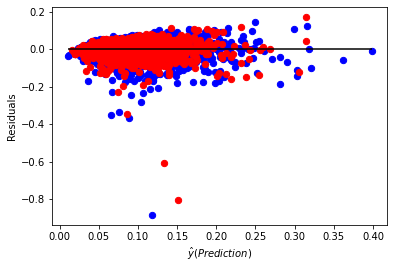

In [101]:
# Residual Plot (Restwert)
train_pred = regr.predict(X_train)
test_pred = regr.predict(X_test)

min_val = min(min(train_pred), min(test_pred))
max_val = max(max(train_pred), max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue", s=40)
plt.scatter(test_pred, test_pred - y_test, color="red", s=40)
plt.hlines(y = 0, xmin =min_val, xmax=max_val)
plt.xlabel("$\hat{y} (Prediction)$")
plt.ylabel("Residuals")
plt.show()

In [104]:
test_pred = regr.predict(X_test)
print("MSE: ", mean_squared_error(y_test, test_pred))


MSE:  0.001640779228796358


## Deep Learning Models

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense())

In [ ]:
model.summary()

In [ ]:
sgd_opt = SGD()

In [ ]:
model.compile()

In [ ]:
model.fit()

In [ ]:
score = model.evaluate()

## Hyperparamters Optimization

## Evaluation

### Model Evaluation (Performance)

#### Training Phase

#### Testing Phase

# Projekt Evaluation

# Deployment

In the first phase of CRISP the overall business-case, which shall be supported by the data mining process must be clearly defined and understood. Then the goal of the data mining project itself must be defined. This includes the specification of metrics for measuring the performance of the data mining project.

In the second phase data must be gathered, accessed, understood and described. Quantitiy and qualitity of the data must be assessed on a high-level.

In the third phase data must be investigated and understood more thoroughly. Common means for understanding data are e.g. visualization and the calculation of simple statistics. Outliers must be detected and processed, sampling rates must be determined, features must be selected and eventually be transformed to other formats.

In the modelling phase various algorithms and their hyperparameters are selected and applied. Their performance on the given data is determined in the evaluation phase.

The output of the evaluation is usually fed back to the first phases (business- and data-understanding). Applying this feedback the techniques in the overall process are adapted and optimized. Usually only after several iterations of this process the evaluation yields good results and the project can be deployed.